# 04 - K-Means Implementation

Today we will code by ourself a K-Means clustering algorithm.

---

![](https://www.staleystire.com/Portals/118/xBlog/uploads/2018/11/8/sam-loyd-1066267-unsplash.jpg)

---

We will begin by generating a sample data for testing purposes.

In [83]:
import numpy as np
np.random.seed(0)
x = np.random.rand(2, 20)*20-8
x

array([[ 2.97627008,  6.30378733,  4.05526752,  2.89766366,  0.47309599,
         4.91788226,  0.75174423,  9.83546002, 11.27325521, -0.33116962,
         7.83450076,  2.5778984 ,  3.36089122, 10.51193277, -6.57927884,
        -6.25741401, -7.59563205,  8.65239691,  7.56313502,  9.40024296],
       [11.57236684,  7.98317128,  1.22958725,  7.61058353, -5.63451148,
         4.79842043, -5.13293425, 10.89337834,  2.43696644,  0.2932388 ,
        -2.70888776,  7.48467379,  1.12300664,  3.36867898, -7.62420399,
         4.35270994,  4.24191445,  4.33867994, 10.87496157,  5.63640598]])

### 1. Compute the center

Let's start by implementing a function that compute the center of a cluster: the function `compute_center(x)` that returns a 1D numpy array.

Here we assume that x is a 2D numpy array of shape (2, number of samples).

So basically, given an array of points, you have to compute the gravity center of this array (the mean value). Then test the result.

In [84]:
# TODO: implement the function compute_center(x)
"""
input:
- array of pts
output:
- center coordinates
"""
def compute_center(x):
    return x.mean(axis=1)

center = compute_center(x)
print(center.shape)
center

(2,)


array([3.63109649, 3.35691034])

### 2. Euclidian distance

Let's now compute the distance between a cluster center and a bunch of points.
Implement yourself the method `dist(x, center)` that returns the euclidian distance between x and the center.

`x` is a 2D numpy arrays of shape *(2, number of samples)*.

In [85]:
import math

In [86]:
# TODO: implement the function dist(x, center)
"""
input:
- x: 2D array
- center: 2D array
"""
def euclid_dist(x, center):
    #if x.shape[1] != 2 or center.shape[1] != 2:
    #    return 'Erreur: 2D arrays attendus'
    sum_squares = (x[0] - center[0]) ** 2 + (x[1] - center[1]) ** 2
    return math.sqrt(sum_squares)

print(euclid_dist(x, center))

TypeError: only size-1 arrays can be converted to Python scalars

### 3. Find closest center

Code the function `find_closest(sample, centers)` that finds the closest center and returns its index.

This functions takes as input a value `sample` of shape (2) for the coordinates, and `centers` of shape (2, K). 

It returns the index (between 0 and K-1) of the closest center.

In [75]:
# TODO: implement the function find_closest(x, centers)

def find_closest(x, centers):
    # compute the closest center
    nb_clusters = centers.shape[1]
    min_dist = 10 ** 15 # voir comment faire autrement
    k_closest = -1
    for k in range(0, nb_clusters):
        center = centers[:, k]
        print(f'find_closest centers: {centers}')
        dist = euclid_dist(x, center)
        if dist < min_dist:
            min_dist = dist
            k_closest = k
    return k_closest

### 4. Initialization

Now let's make the `initialization(K)` function. This function takes as input `K`: the number of clusters.

It returns a 2D numpy array of shape (2, K): K centers of 2 values (the coordinates), between -10 and 10 for this exercise.

> 🔦**Hint**: use the function *np.random.rand()* and multiply/add values to it in order to reach values between -10 and 10

In [76]:
# TODO: implement initialization(K)
# initial clusters seeding
def initialization(K):
    centers = (np.random.rand(2, K) - 0.5) * 20
    return centers

centers = initialization(3)
centers

array([[-2.80984199, -1.25936092,  3.95262392],
       [-8.79549057,  3.33533431,  3.41275739]])

### 5. Assignment

Now let's make the `assigment(x, centers)` function!
This function takes as input a 2D numpy array of values `x` (shape (2, number of samples)), and a 2D numpy array of centers `centers` (shape (2, K)). This function should return a 1D array of indices (shape (number of samples): for each `x` it returns the index of the closest center in `centers`.

In [77]:
# TODO: implement the method assignment(x, centers)
def assignment(x, centers):
    closest_centers = []  ##np.zeros(2, centers.shape[1])
    print(f'x.shape: {x.shape}')
    for i in range(0, x.shape[1]):
        closest_center_idx = find_closest(x[:,i], centers)
        closest_centers.append(closest_center_idx)   ###closest_centers.append(closest_centers, closest_center)
    closest_centers = np.array(closest_centers)
    print(f'type(closest_centers): {type(closest_centers)}')
    print(f'closest shape: {closest_centers.shape}')
    return closest_centers #shape(nb samples)

### 6. Update

Now we will implement the function `update(x, closest, K)`  that will update the centers' coordinate.

This function takes as input the data `x` of shape (2, number of samples), the closest clusters of each sample in `closest` of shape (number of sample) and `K` the number of clusters.

It will return new centers of shape (2, K).

This function will use the function *compute_center*.

In [78]:
# TODO: implement the function update(x, closest)
# question : à quoi sert ici le paramètre K ?

"""
x  :(2, nb samples)
closest: (nb_samples): idx of closest center for each x value

calculer les barycentres pour chaque sous-ensemble de points selon leur affectation
centers =
x: c1_x, c2_x, ..., ck_x
y: c1_y, c2_y, ..., ck_y
"""
def update(x, closest, K):
    #print(f'x.shape[1]: {x.shape[1]}')
    centers = []
    #print(f'closest shape: {closest.shape}')
    for k in range(0, K):
        #print(f'k: {k}')
        # get the points of x labelled to cluster #k
        subset = []
        for i in range(0, x.shape[1]):
            #print(f'i: {i}')
            #print(f'closest[i]: {closest[i]}')
            if closest[i] == k:
                #print(f'x[:, i]: {x[:, i]}')
                subset.append(x[:, i])
        subset = np.transpose(np.array(subset))
        print(f'subset.shape: {subset.shape}')
        # compute center of subset #k
        center = compute_center(subset)
        print(f'center: {center}')
        centers.append(center)

    return np.transpose(np.array(centers)) #shape(2, K)

### 7. Final algorithm

Finally let's make the complete algorithm! We will begin with an easier algorithm, just making one iteration. Meaning a function doing only initialization, assignment and then update.

You will define a function called `kmeans_noiter(x, K)`, that reuses initialization, assignment and update functions implemented previously.

In [79]:
# TODO: implement the function kmeans_noiter(x, K)
# 1. initialization
# 2. assignment
# 3. update
def kmeans_noiter(x, K):
    centers = initialization(K)
    #print(f'centers init: {centers}')
    closest_centers_idx = assignment(x, centers)
    new_centers = update(x, closest_centers_idx, K)
    return new_centers

In [80]:
# test de la fcn
centers = kmeans_noiter(x, 3)
#print(f'centers: {centers}')
centers.shape #(2,3) attendu

x.shape: (2, 20)
find_closest centers: [[-5.79234878 -7.42147405 -3.69143298]
 [-2.72578458  1.40393541 -1.22796973]]
find_closest centers: [[-5.79234878 -7.42147405 -3.69143298]
 [-2.72578458  1.40393541 -1.22796973]]
find_closest centers: [[-5.79234878 -7.42147405 -3.69143298]
 [-2.72578458  1.40393541 -1.22796973]]
find_closest centers: [[-5.79234878 -7.42147405 -3.69143298]
 [-2.72578458  1.40393541 -1.22796973]]
find_closest centers: [[-5.79234878 -7.42147405 -3.69143298]
 [-2.72578458  1.40393541 -1.22796973]]
find_closest centers: [[-5.79234878 -7.42147405 -3.69143298]
 [-2.72578458  1.40393541 -1.22796973]]
find_closest centers: [[-5.79234878 -7.42147405 -3.69143298]
 [-2.72578458  1.40393541 -1.22796973]]
find_closest centers: [[-5.79234878 -7.42147405 -3.69143298]
 [-2.72578458  1.40393541 -1.22796973]]
find_closest centers: [[-5.79234878 -7.42147405 -3.69143298]
 [-2.72578458  1.40393541 -1.22796973]]
find_closest centers: [[-5.79234878 -7.42147405 -3.69143298]
 [-2.72578458

(2, 3)

(2, 20)


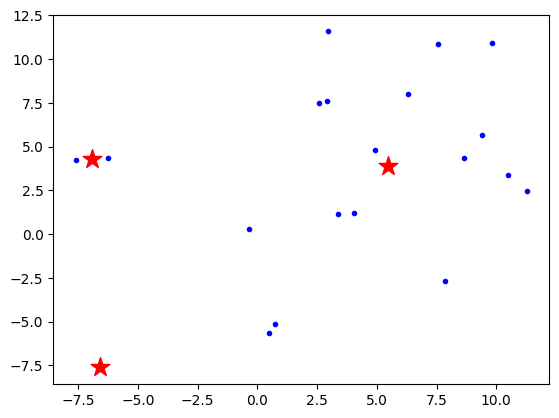

In [81]:
# display the clusters
import matplotlib.pyplot as plt

print(x.shape)

plt.scatter(x[0,:], x[1,:], c='blue', marker='.')
# display the clusters centers
plt.scatter(centers[0,:], centers[1,:], marker="*", s=200, c='red')
plt.show()

### 8. Iterations improvement

Then to make it really good, we have to make a slight change. A loop has to be added around the assignment and update parts.

In this loop you have to take the mean value of the difference between the old and the new centers. While the absolute value of this difference is above a small value, e.g. 0.01, keep looping.

You will defined the function `kmeans(x, K)` doing so.

In [8]:
# TODO: implement the function kmeans(x, K)

### 9. Visualization

Now plot the clustered data, with three differents colors and clusters centers with stars.

In [9]:
# TODO: plot a scatter plot of the data clusters and cluster centers